In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

             Benchmark  Threads    Time_ns  CPU_Time_ns  Iterations  \
0   BM_AtomicIncrement        1     420090       420067        1731   
1   BM_AtomicIncrement        2    2027040      2025496         332   
2   BM_AtomicIncrement        4    4362969      4182001         176   
3   BM_AtomicIncrement        8    7431173      7424018          96   
4   BM_AtomicIncrement       16    9138204      5401903          80   
5   BM_AtomicIncrement       32   16984412      7501452         160   
6   BM_AtomicIncrement       64   13029282      4297701          64   
7   BM_AtomicIncrement      120   37003492      7312163         120   
8    BM_MutexIncrement        1    1264488      1263727         522   
9    BM_MutexIncrement        2    8364086      7608503          74   
10   BM_MutexIncrement        4   12117470      7334797          52   
11   BM_MutexIncrement        8   32991350     13669888          24   
12   BM_MutexIncrement       16   76041437     16869873          16   
13   B

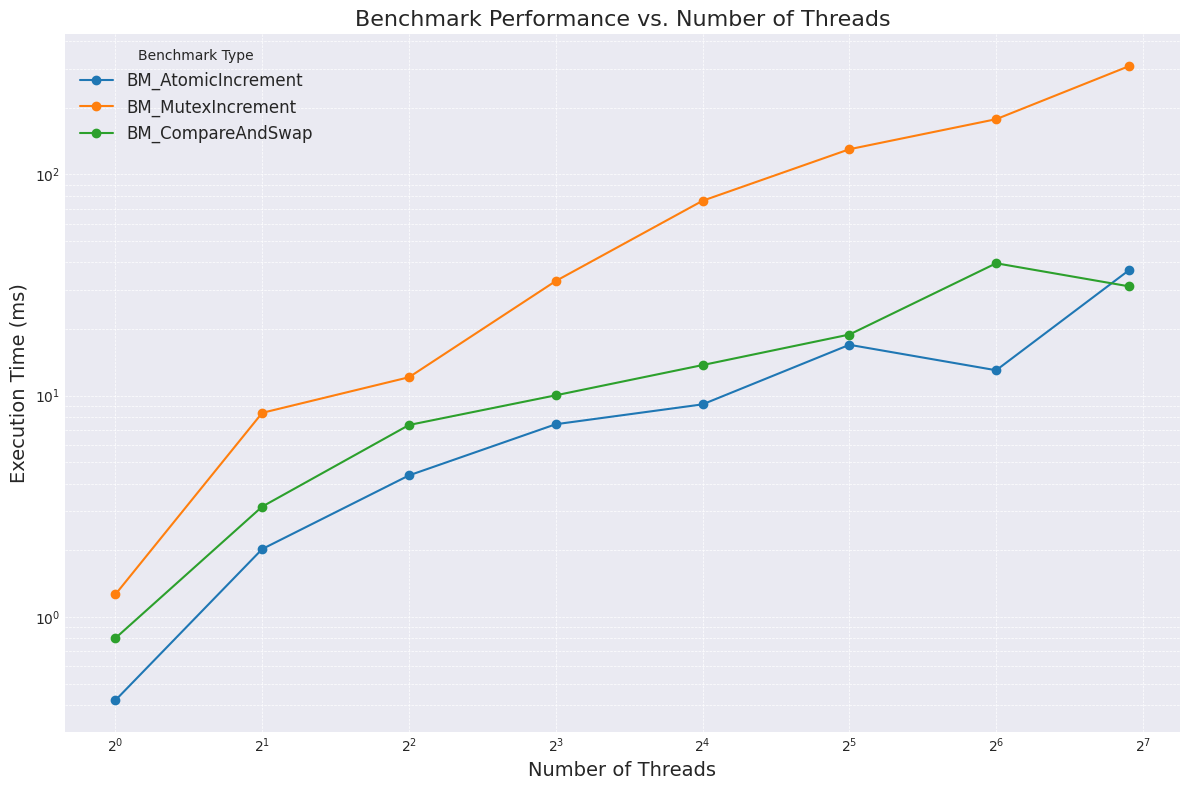

In [3]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Benchmark output as a multi-line string
benchmark_output = """
Running ./mybenchmark
Run on (8 X 2112.01 MHz CPU s)
CPU Caches:
  L1 Data 32 KiB (x8)
  L1 Instruction 64 KiB (x8)
  L2 Unified 2048 KiB (x8)
  L3 Unified 25600 KiB (x8)
Load Average: 1.87, 1.52, 1.25
Cores available: 8
-----------------------------------------------------------------------------------
Benchmark                                         Time             CPU   Iterations
-----------------------------------------------------------------------------------
BM_AtomicIncrement/real_time/threads:1       420090 ns       420067 ns         1731
BM_AtomicIncrement/real_time/threads:2      2027040 ns      2025496 ns          332
BM_AtomicIncrement/real_time/threads:4      4362969 ns      4182001 ns          176
BM_AtomicIncrement/real_time/threads:8      7431173 ns      7424018 ns           96
BM_AtomicIncrement/real_time/threads:16     9138204 ns      5401903 ns           80
BM_AtomicIncrement/real_time/threads:32    16984412 ns      7501452 ns          160
BM_AtomicIncrement/real_time/threads:64    13029282 ns      4297701 ns           64
BM_AtomicIncrement/real_time/threads:120   37003492 ns      7312163 ns          120
BM_MutexIncrement/real_time/threads:1       1264488 ns      1263727 ns          522
BM_MutexIncrement/real_time/threads:2       8364086 ns      7608503 ns           74
BM_MutexIncrement/real_time/threads:4      12117470 ns      7334797 ns           52
BM_MutexIncrement/real_time/threads:8      32991350 ns     13669888 ns           24
BM_MutexIncrement/real_time/threads:16     76041437 ns     16869873 ns           16
BM_MutexIncrement/real_time/threads:32    130004254 ns     22053877 ns           32
BM_MutexIncrement/real_time/threads:64    177756300 ns     16998231 ns           64
BM_MutexIncrement/real_time/threads:120   308999532 ns     19298329 ns          120
BM_CompareAndSwap/real_time/threads:1        801620 ns       799850 ns          625
BM_CompareAndSwap/real_time/threads:2       3152785 ns      3149236 ns          240
BM_CompareAndSwap/real_time/threads:4       7371670 ns      7272504 ns          100
BM_CompareAndSwap/real_time/threads:8      10040617 ns      9650247 ns           72
BM_CompareAndSwap/real_time/threads:16     13753764 ns     10638104 ns           48
BM_CompareAndSwap/real_time/threads:32     18897818 ns     12861444 ns           96
BM_CompareAndSwap/real_time/threads:64     39677444 ns     10405274 ns           64
BM_CompareAndSwap/real_time/threads:120    31190698 ns     12376814 ns          120
"""

# Regular expression to match the benchmark data lines
pattern = re.compile(
    r'^(BM_[^\s]+)'            # Benchmark name
    r'\s+([0-9]+) ns'          # Time
    r'\s+([0-9]+) ns'          # CPU Time
    r'\s+([0-9]+)$',           # Iterations
    re.MULTILINE
)

# List to store parsed data
data = []

# Parse the benchmark output
for match in pattern.finditer(benchmark_output):
    benchmark_full_name = match.group(1)
    time_ns = int(match.group(2))
    cpu_time_ns = int(match.group(3))
    iterations = int(match.group(4))
    
    # Extract benchmark type and number of threads
    # Format: BM_Name/real_time/threads:NumThreads
    benchmark_parts = benchmark_full_name.split('/')
    benchmark_name = benchmark_parts[0]
    threads_info = benchmark_parts[-1]
    threads = int(threads_info.split(':')[1])
    
    # Append the extracted data to the list
    data.append({
        'Benchmark': benchmark_name,
        'Threads': threads,
        'Time_ns': time_ns,
        'CPU_Time_ns': cpu_time_ns,
        'Iterations': iterations
    })

# Create a DataFrame from the parsed data
df = pd.DataFrame(data)

# Convert time from nanoseconds to milliseconds for better readability
df['Time_ms'] = df['Time_ns'] / 1e6

# Print the DataFrame to verify the parsed data
print(df)

# Plotting the data
plt.figure(figsize=(12, 8))

# Use Seaborn to set the style
sns.set_style('darkgrid')

# Plot each benchmark
for benchmark_name in df['Benchmark'].unique():
    df_bench = df[df['Benchmark'] == benchmark_name].sort_values('Threads')
    plt.plot(df_bench['Threads'], df_bench['Time_ms'], marker='o', label=benchmark_name)

# Set logarithmic scale for x and y axes
plt.xscale('log', base=2)
plt.yscale('log')

# Labeling the axes and title
plt.xlabel('Number of Threads', fontsize=14)
plt.ylabel('Execution Time (ms)', fontsize=14)
plt.title('Benchmark Performance vs. Number of Threads', fontsize=16)

# Adding a legend
plt.legend(title='Benchmark Type', fontsize=12)

# Adding grid lines
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()



                Benchmark  Threads    Time_ns  CPU_Time_ns  Iterations  \
0      BM_AtomicIncrement        1     456821       456774        1207   
1      BM_AtomicIncrement        2    1742480      1741738         404   
2      BM_AtomicIncrement        4    3806007      3749990         188   
3      BM_AtomicIncrement        8    6336273      5120777          80   
4      BM_AtomicIncrement       16    8514084      7373294          80   
5      BM_AtomicIncrement       32   16106444      7180044         256   
6      BM_AtomicIncrement       64   20933456      5930054         128   
7      BM_AtomicIncrement      120   31977284      6316881         120   
8       BM_MutexIncrement        1    1379141      1376443         461   
9       BM_MutexIncrement        2    8755857      8245025         110   
10      BM_MutexIncrement        4   14852338      8251406          40   
11      BM_MutexIncrement        8   34317174     14966446          32   
12      BM_MutexIncrement       16   7

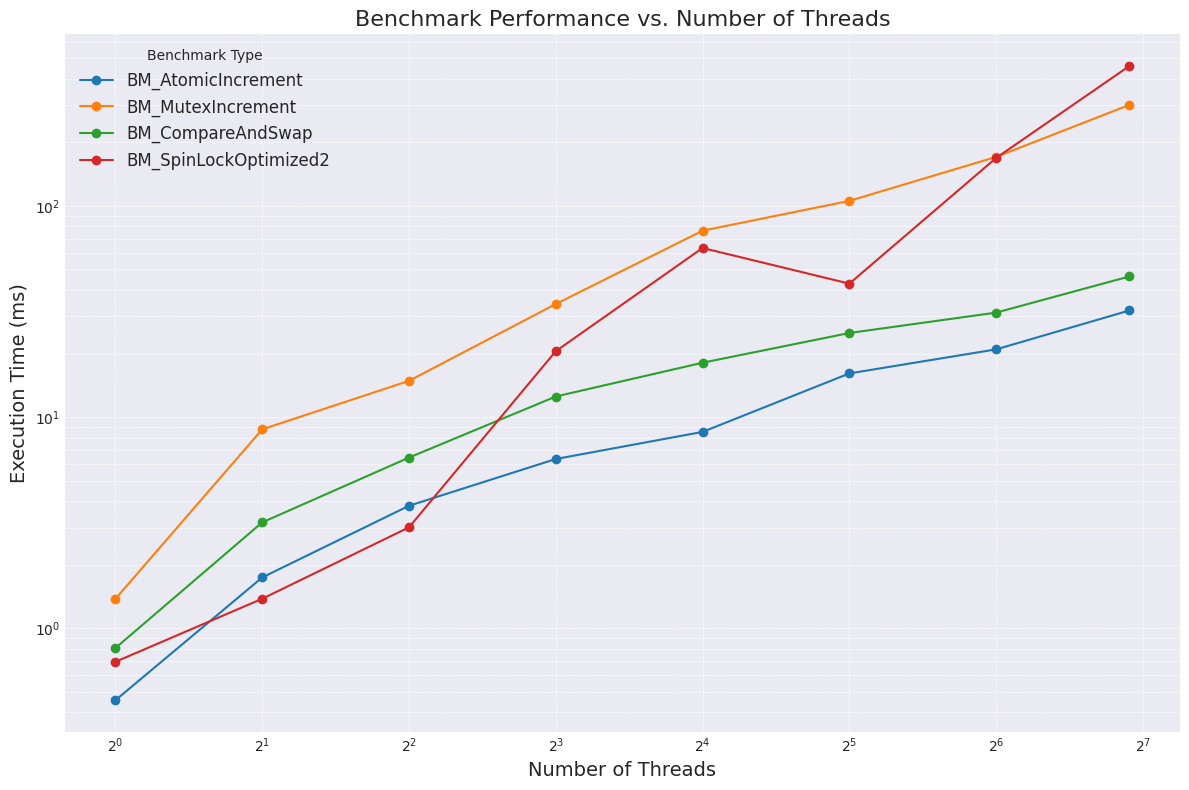

In [4]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# New benchmark output as a multi-line string
benchmark_output = """
2024-10-08T17:41:19+08:00
Running ./mybenchmark
Run on (8 X 2112.01 MHz CPU s)
CPU Caches:
  L1 Data 48 KiB (x8)
  L1 Instruction 32 KiB (x8)
  L2 Unified 1280 KiB (x8)
  L3 Unified 25600 KiB (x8)
Load Average: 3.88, 2.32, 0.94
Cores available: 8
--------------------------------------------------------------------------------------
Benchmark                                            Time             CPU   Iterations
--------------------------------------------------------------------------------------
BM_AtomicIncrement/real_time/threads:1          456821 ns       456774 ns         1207
BM_AtomicIncrement/real_time/threads:2         1742480 ns      1741738 ns          404
BM_AtomicIncrement/real_time/threads:4         3806007 ns      3749990 ns          188
BM_AtomicIncrement/real_time/threads:8         6336273 ns      5120777 ns           80
BM_AtomicIncrement/real_time/threads:16        8514084 ns      7373294 ns           80
BM_AtomicIncrement/real_time/threads:32       16106444 ns      7180044 ns          256
BM_AtomicIncrement/real_time/threads:64       20933456 ns      5930054 ns          128
BM_AtomicIncrement/real_time/threads:120      31977284 ns      6316881 ns          120
BM_MutexIncrement/real_time/threads:1          1379141 ns      1376443 ns          461
BM_MutexIncrement/real_time/threads:2          8755857 ns      8245025 ns          110
BM_MutexIncrement/real_time/threads:4         14852338 ns      8251406 ns           40
BM_MutexIncrement/real_time/threads:8         34317174 ns     14966446 ns           32
BM_MutexIncrement/real_time/threads:16        76314157 ns     19710046 ns           16
BM_MutexIncrement/real_time/threads:32       105623115 ns     16002273 ns           32
BM_MutexIncrement/real_time/threads:64       170573515 ns     13985442 ns           64
BM_MutexIncrement/real_time/threads:120      300609534 ns     16719795 ns          120
BM_CompareAndSwap/real_time/threads:1           806870 ns       806848 ns          715
BM_CompareAndSwap/real_time/threads:2          3175596 ns      3173293 ns          254
BM_CompareAndSwap/real_time/threads:4          6435447 ns      6426344 ns          128
BM_CompareAndSwap/real_time/threads:8         12521688 ns     10819160 ns           56
BM_CompareAndSwap/real_time/threads:16        18098797 ns      9745570 ns           48
BM_CompareAndSwap/real_time/threads:32        25023843 ns     13892472 ns           32
BM_CompareAndSwap/real_time/threads:64        31250668 ns     10848113 ns           64
BM_CompareAndSwap/real_time/threads:120       46340731 ns     11724875 ns          120
BM_SpinLockOptimized2/real_time/threads:1       694713 ns       694482 ns          919
BM_SpinLockOptimized2/real_time/threads:2      1381319 ns       816321 ns          422
BM_SpinLockOptimized2/real_time/threads:4      3008374 ns      1369120 ns          320
BM_SpinLockOptimized2/real_time/threads:8     20523542 ns     10711659 ns           80
BM_SpinLockOptimized2/real_time/threads:16    63205763 ns     20974246 ns           16
BM_SpinLockOptimized2/real_time/threads:32    42855769 ns     12941122 ns           32
BM_SpinLockOptimized2/real_time/threads:64   168678569 ns     21815125 ns           64
BM_SpinLockOptimized2/real_time/threads:120  459206886 ns     35958761 ns          120
"""

# Regular expression to match the benchmark data lines
pattern = re.compile(
    r'^(BM_[^\s]+)'            # Benchmark name
    r'\s+([0-9]+) ns'          # Time
    r'\s+([0-9]+) ns'          # CPU Time
    r'\s+([0-9]+)$',           # Iterations
    re.MULTILINE
)

# List to store parsed data
data = []

# Parse the benchmark output
for match in pattern.finditer(benchmark_output):
    benchmark_full_name = match.group(1)
    time_ns = int(match.group(2))
    cpu_time_ns = int(match.group(3))
    iterations = int(match.group(4))
    
    # Extract benchmark type and number of threads
    # Format: BM_Name/real_time/threads:NumThreads
    benchmark_parts = benchmark_full_name.split('/')
    benchmark_name = benchmark_parts[0]
    threads_info = benchmark_parts[-1]
    threads = int(threads_info.split(':')[1])
    
    # Append the extracted data to the list
    data.append({
        'Benchmark': benchmark_name,
        'Threads': threads,
        'Time_ns': time_ns,
        'CPU_Time_ns': cpu_time_ns,
        'Iterations': iterations
    })

# Create a DataFrame from the parsed data
df = pd.DataFrame(data)

# Convert time from nanoseconds to milliseconds for better readability
df['Time_ms'] = df['Time_ns'] / 1e6

# Print the DataFrame to verify the parsed data
print(df)

# Plotting the data
plt.figure(figsize=(12, 8))

# Use Seaborn to set the style
sns.set_style('darkgrid')

# Plot each benchmark
for benchmark_name in df['Benchmark'].unique():
    df_bench = df[df['Benchmark'] == benchmark_name].sort_values('Threads')
    plt.plot(df_bench['Threads'], df_bench['Time_ms'], marker='o', label=benchmark_name)

# Set logarithmic scale for x and y axes
plt.xscale('log', base=2)
plt.yscale('log')

# Labeling the axes and title
plt.xlabel('Number of Threads', fontsize=14)
plt.ylabel('Execution Time (ms)', fontsize=14)
plt.title('Benchmark Performance vs. Number of Threads', fontsize=16)

# Adding a legend
plt.legend(title='Benchmark Type', fontsize=12)

# Adding grid lines
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


Note that, just pure spinlocks and simply spinlocks with load alone yield TERRIBLE performance, I had to restart my machine twice. 
Using nanosleep yields better performance than sched_yield()